installation of keras et tensorflow's version required for the good of innvestigate 


In [25]:
!pip install keras==2.2.4
!pip install tensorflow==1.12
!pip install mnist
!pip install innvestigate

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import innvestigate
import innvestigate.utils
import cv2
import keras
from keras.preprocessing import image
from keras.utils import np_utils
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
import cv2
import time
from skimage.metrics import structural_similarity as ssim

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarn

In [26]:
#load mnist data

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [27]:
num_classes=10
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

In [28]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
train_images.shape

(60000, 28, 28, 1)

In [29]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [30]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [31]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 119s 2ms/step - loss: 0.1964 - acc: 0.9554 - val_loss: 0.0761 - val_acc: 0.9788
Epoch 2/5
48000/48000 [==============================] - 114s 2ms/step - loss: 0.0582 - acc: 0.9835 - val_loss: 0.0603 - val_acc: 0.9822
Epoch 3/5
48000/48000 [==============================] - 115s 2ms/step - loss: 0.0426 - acc: 0.9869 - val_loss: 0.0477 - val_acc: 0.9852
Epoch 4/5
48000/48000 [==============================] - 115s 2ms/step - loss: 0.0323 - acc: 0.9900 - val_loss: 0.0443 - val_acc: 0.9876
Epoch 5/5
48000/48000 [==============================] - 118s 2ms/step - loss: 0.0261 - acc: 0.9921 - val_loss: 0.0404 - val_acc: 0.9873


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


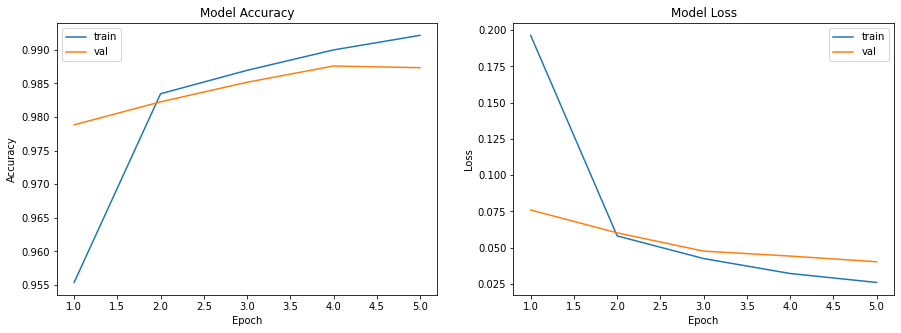

Model took 582.52 seconds to train
Accuracy on test data is: 98.69


In [32]:
#model architecture and plot

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=( 28, 28,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Conv2D(16, (3, 3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(num_classes))
model.add(Activation("softmax"))
# model5 the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model_info=model.fit(train_images, train_labels, epochs=5, verbose=1,validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_images, test_labels, model))

In [33]:
#save the model's weight in order to use them in the randomization functions

model.save_weights('model5.h5')

In [34]:
#choose the first image in the test set to apply the explainability methods 

x_drive1 = image.img_to_array(test_images[0])
x_drive1 = np.expand_dims(x_drive1, axis=0)
x_drive1.shape

(1, 28, 28, 1)

In [35]:
#drop the softmax activation function
model_softmax = innvestigate.utils.model_wo_softmax(model)


In [36]:
layer_names=[layer.name for layer in model_softmax.layers]
print(layer_names)
print(len(layer_names))

['conv2d_9_input', 'conv2d_9', 'batch_normalization_13', 'activation_65', 'conv2d_10', 'batch_normalization_14', 'activation_66', 'max_pooling2d_5', 'flatten_5', 'dense_9', 'batch_normalization_15', 'activation_67', 'dense_10']
13


In [37]:
#randomly permute the layers !
random_list=np.random.permutation(range(0,len(layer_names),1))
print(random_list)

[ 0 11  3  4 12  1  7 10  8  2  6  9  5]


In [38]:
#function for cascading randomization
def cascading_random(model,x_drive,layer_names,method):

  L_names=[]
  L_maps=[]
  session = keras.backend.get_session()
  model.load_weights('model5.h5')
  for i in range(len(layer_names),0,-1):
    layer=model.get_layer(layer_names[i-1]) 

    if hasattr(layer, 'kernel_initializer'):
      layer.kernel.initializer.run(session=session)
      analyzer = innvestigate.create_analyzer(method, model)
      a = analyzer.analyze(x_drive)
      L_maps.append(a)
      L_names.append(layer_names[i-1])
  return L_maps,L_names

In [39]:
#function for independent randomization
def indep_random(model,x_drive,layer_names,random_list,method):

  L_names=[]
  L_maps=[]
  session = keras.backend.get_session()

  for i in range(len(random_list)):
    model.load_weights('model5.h5')
    layer=model.get_layer(layer_names[random_list[i]]) 
    
    if hasattr(layer, 'kernel_initializer'):
      layer.kernel.initializer.run(session=session)
      analyzer = innvestigate.create_analyzer(method, model)
      a = analyzer.analyze(x_drive)
      L_maps.append(a)
      L_names.append(layer_names[random_list[i]])
  return L_maps,L_names

In [40]:
# Methods we use and some properties.
methods = ["input","gradient","smoothgrad" ,"deconvnet","guided_backprop","deep_taylor","input_t_gradient",
"integrated_gradients","lrp.z","lrp.epsilon","lrp.sequential_preset_a_flat","lrp.sequential_preset_b_flat"]

In [41]:
# Create analyzers.
analyzers_cas = []
names_cas=[]
analyzers_data=[]
names_data=[]
for method in methods:
    try:
      print(method)
      map_c,name_c = cascading_random(model_softmax,x_drive1,layer_names,method)               # apply the randomization function to every method
      map_r,name_r=indep_random(model_softmax,x_drive1,layer_names,random_list,method)

    except innvestigate.NotAnalyzeableModelException:
        # Not all methods work with all models.
        analyzer = None
    analyzers_cas.append(map_c)
    analyzers_data.append(map_r)
    names_cas.append(name_c)
    names_data.append(name_r)

input
gradient
smoothgrad
deconvnet
guided_backprop
deep_taylor
input_t_gradient
integrated_gradients
lrp.z
lrp.epsilon
lrp.sequential_preset_a_flat
lrp.sequential_preset_b_flat


In [42]:
indep=np.asanyarray(analyzers_data)
cascading=np.asanyarray(analyzers_cas)
#analyzers_cas.shape
cascading.shape

(12, 4, 1, 28, 28, 1)

## cascading grid visualization !

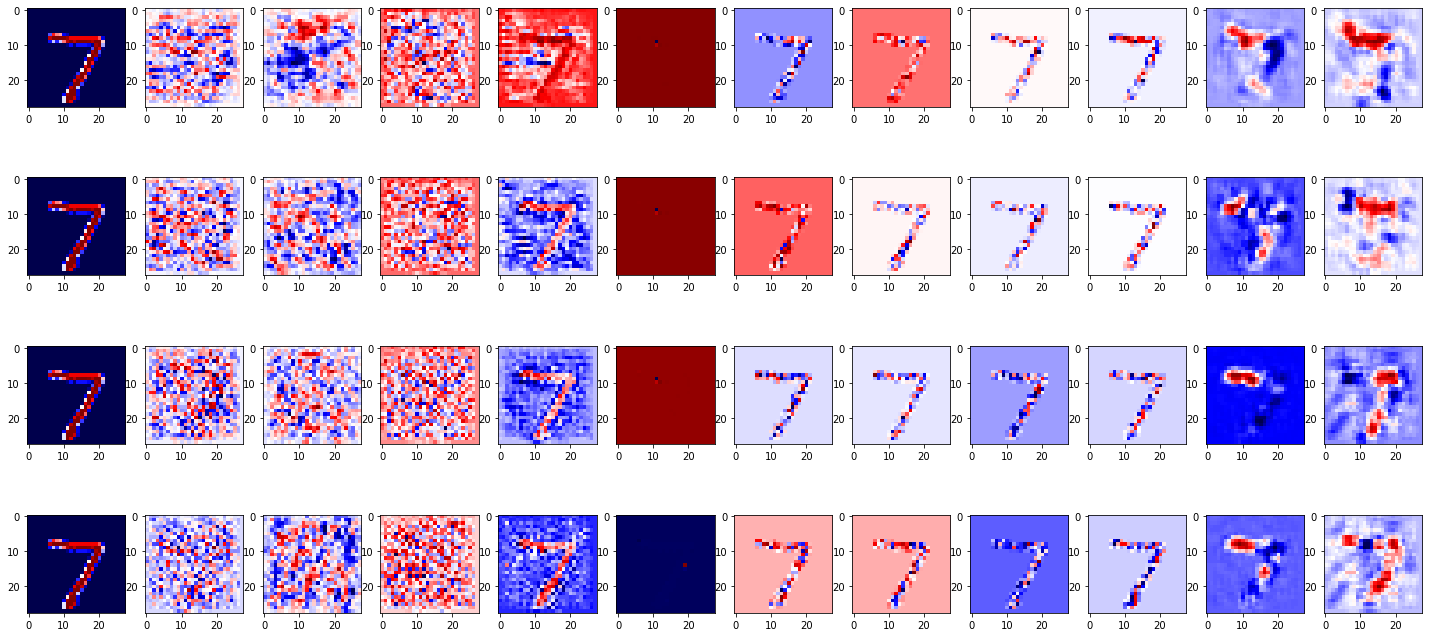

In [43]:
fig = plt.figure(figsize=(25,15))

for j in range(12):
  for i in range(4):
    (plt.subplot2grid((5,12),(i,j))).imshow(cascading[j,i].squeeze(),cmap="seismic",interpolation='nearest')

## independent grid visualization


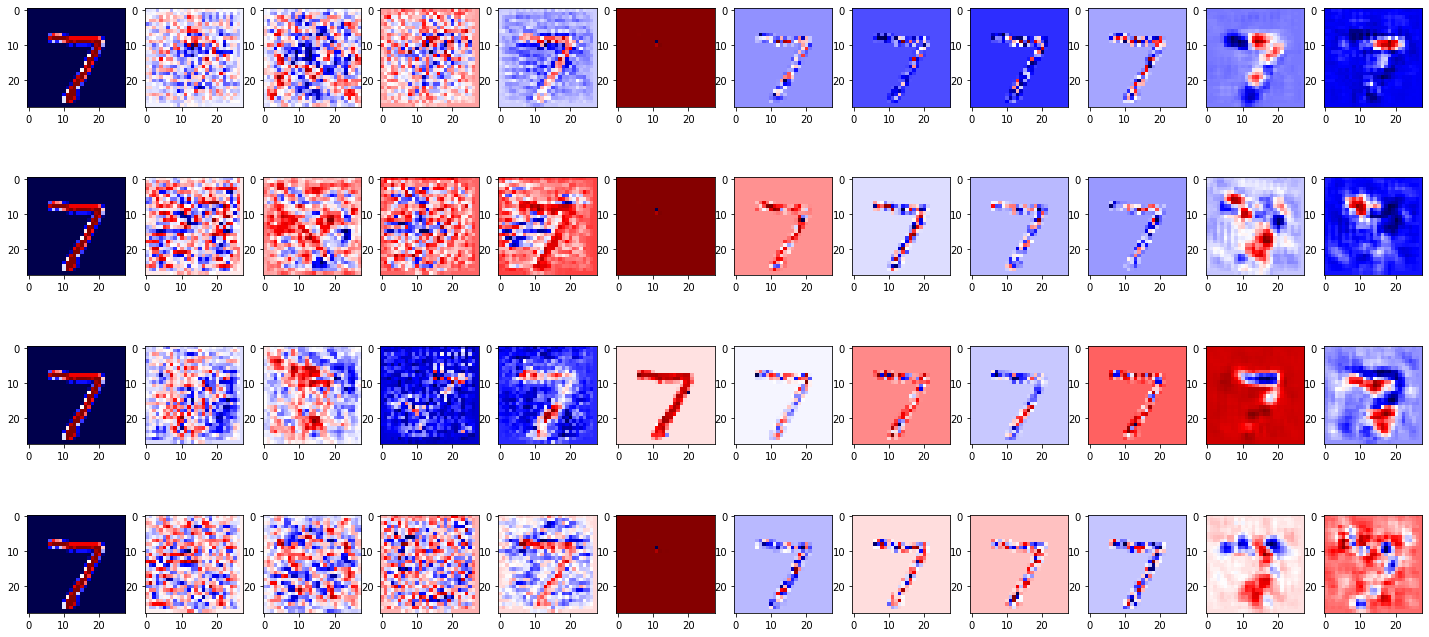

In [47]:
fig = plt.figure(figsize=(25,15))

for j in range(12):
  for i in range(4):
    (plt.subplot2grid((5,12),(i,j))).imshow(indep[j,i].squeeze(),cmap="seismic",interpolation='nearest')

In [48]:
# function for calculating the spearmen correlation rank  
def abs_rank(original, sailency):
  rank=stats.spearmanr(np.abs(original.flatten()),np.abs(sailency.flatten()))
  return rank

def Noabs_rank(original, sailency):
  rank=stats.spearmanr(original.flatten(),sailency.flatten())
  return rank

In [49]:
##SSIM 
def ssim_coeff(original,sailency):
  #image need to be grayscale !
  #original=cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
  #sailency=cv2.cvtColor(sailency, cv2.COLOR_BGR2GRAY)
  return ssim(original,sailency,data_range=sailency.max()-sailency.min(),multichannel=True)

# applying the metrics to every saliency map of every method 

In [50]:
absrankCascade=[]
for i in range(12):


  absrankCascade.append([abs_rank(test_images[0].squeeze(),sail) for sail in cascading[i].squeeze()])

In [51]:
NoabsrankCascade=[]
for i in range(12):
  

  NoabsrankCascade.append([Noabs_rank(test_images[0].squeeze(),sail) for sail in cascading[i].squeeze()])

In [52]:
absrankRandom=[]
for i in range(12):
  

  absrankRandom.append([abs_rank(test_images[0].squeeze(),sail) for sail in indep[i].squeeze()])

In [53]:
NoabsrankRandom=[]
for i in range(12):
  

  NoabsrankRandom.append([Noabs_rank(test_images[0].squeeze(),sail) for sail in indep[i].squeeze()])

In [54]:
SSIM_R=[]
for i in range(12):
  SSIM_R.append([ssim_coeff(test_images[0].squeeze(),sail) for sail in indep[i].squeeze()])

In [55]:
SSIM_C=[]
for i in range(12):
  SSIM_C.append([ssim_coeff(test_images[0].squeeze(),sail) for sail in cascading[i].squeeze()])

In [56]:
corrCascadeAbs=np.asarray(absrankCascade)
corrCascade=np.asarray(NoabsrankCascade)
corrRandomAbs=np.asarray(absrankRandom)
corrRandom=np.asarray(NoabsrankRandom)
SSIMR=np.asanyarray(SSIM_R)
SSIMC=np.asarray(SSIM_C)
SSIMC.shape

(12, 4)

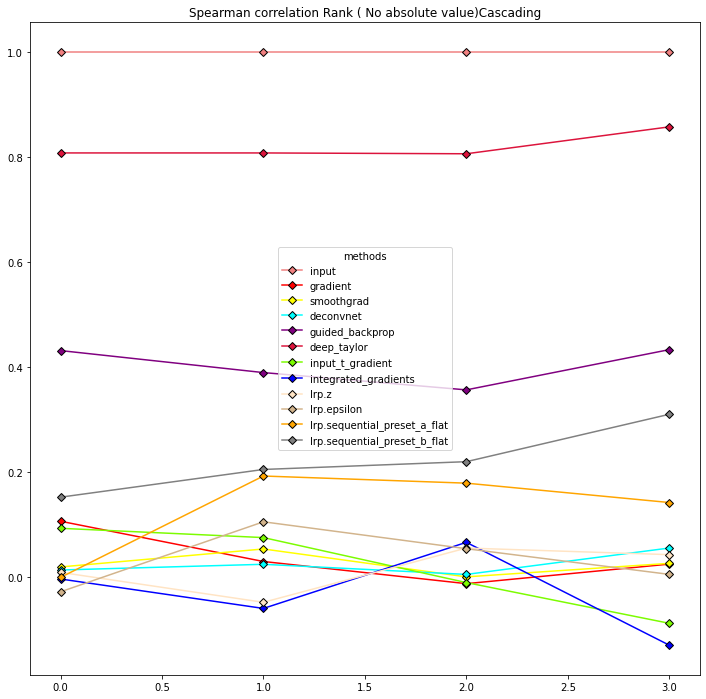

In [57]:
plt.figure(figsize=(12,12))
a1=plt.plot(corrCascade[0,:,0], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(corrCascade[1,:,0], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(corrCascade[2,:,0], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(corrCascade[3,:,0], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(corrCascade[4,:,0], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(corrCascade[5,:,0], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(corrCascade[6,:,0], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(corrCascade[7,:,0], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(corrCascade[8,:,0], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(corrCascade[9,:,0], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(corrCascade[10,:,0], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(corrCascade[11,:,0], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('Spearman correlation Rank ( No absolute value)Cascading')
plt.show()

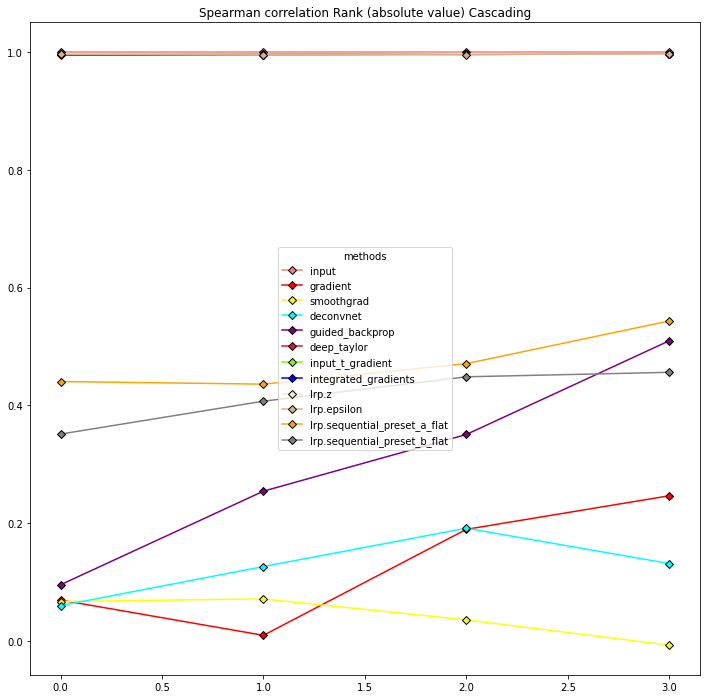

In [58]:
plt.figure(figsize=(12,12))
a1=plt.plot(corrCascadeAbs[0,:,0], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(corrCascadeAbs[1,:,0], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(corrCascadeAbs[2,:,0], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(corrCascadeAbs[3,:,0], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(corrCascadeAbs[4,:,0], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(corrCascadeAbs[5,:,0], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(corrCascadeAbs[6,:,0], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(corrCascadeAbs[7,:,0], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(corrCascadeAbs[8,:,0], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(corrCascadeAbs[9,:,0], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(corrCascadeAbs[10,:,0], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(corrCascadeAbs[11,:,0], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('Spearman correlation Rank (absolute value) Cascading')
plt.show()

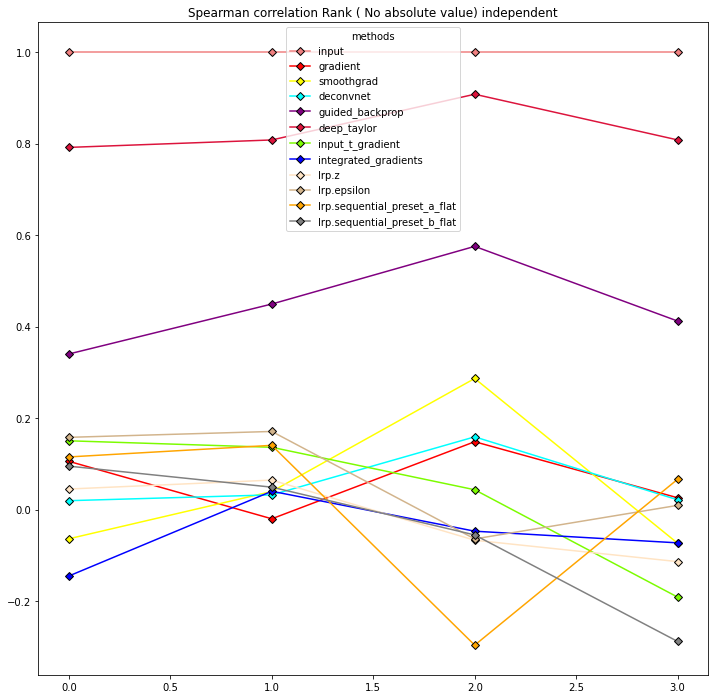

In [60]:
plt.figure(figsize=(12,12))
a1=plt.plot(corrRandom[0,:,0], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(corrRandom[1,:,0], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(corrRandom[2,:,0], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(corrRandom[3,:,0], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(corrRandom[4,:,0], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(corrRandom[5,:,0], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(corrRandom[6,:,0], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(corrRandom[7,:,0], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(corrRandom[8,:,0], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(corrRandom[9,:,0], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(corrRandom[10,:,0], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(corrRandom[11,:,0], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('Spearman correlation Rank ( No absolute value) independent')
plt.show()

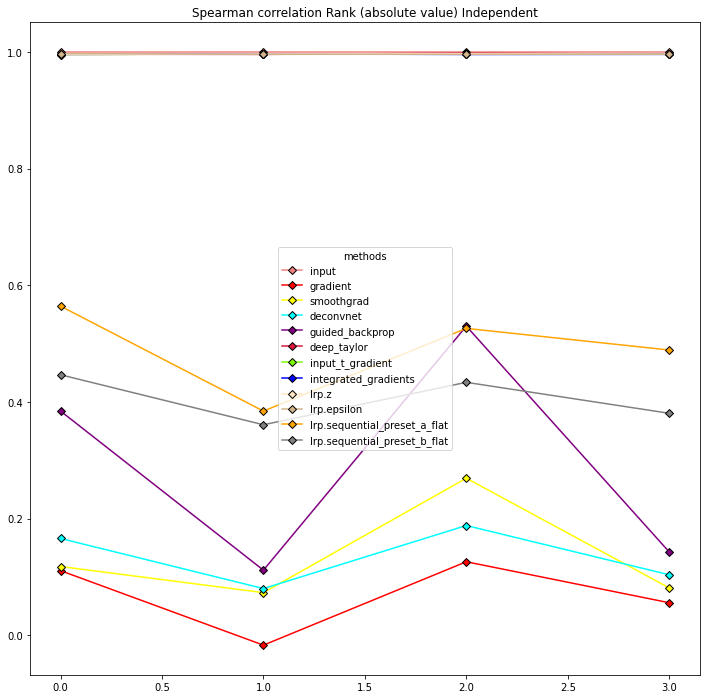

In [61]:
plt.figure(figsize=(12,12))
a1=plt.plot(corrRandomAbs[0,:,0], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(corrRandomAbs[1,:,0], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(corrRandomAbs[2,:,0], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(corrRandomAbs[3,:,0], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(corrRandomAbs[4,:,0], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(corrRandomAbs[5,:,0], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(corrRandomAbs[6,:,0], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(corrRandomAbs[7,:,0], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(corrRandomAbs[8,:,0], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(corrRandomAbs[9,:,0], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(corrRandomAbs[10,:,0], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(corrRandomAbs[11,:,0], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('Spearman correlation Rank (absolute value) Independent')
plt.show()

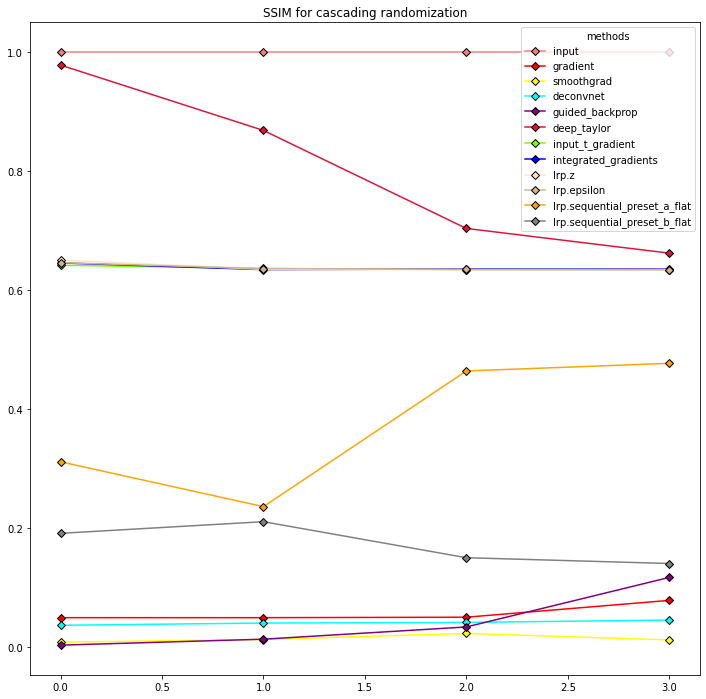

In [62]:
plt.figure(figsize=(12,12))
a1=plt.plot(SSIMC[0,:], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(SSIMC[1,:], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(SSIMC[2,:], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(SSIMC[3,:], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(SSIMC[4,:], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(SSIMC[5,:], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(SSIMC[6,:], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(SSIMC[7,:], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(SSIMC[8,:], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(SSIMC[9,:], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(SSIMC[10,:], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(SSIMC[11,:], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('SSIM for cascading randomization')
plt.show()

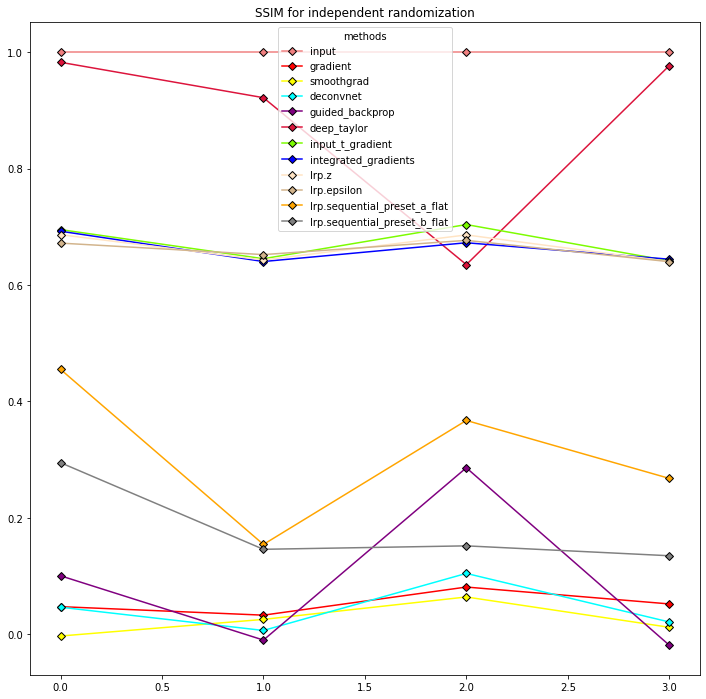

In [63]:
plt.figure(figsize=(12,12))
a1=plt.plot(SSIMR[0,:], color='lightcoral', marker='D', markeredgecolor='black')
a2=plt.plot(SSIMR[1,:], color='red', marker='D', markeredgecolor='black')
a3=plt.plot(SSIMR[2,:], color='yellow', marker='D', markeredgecolor='black')
a4=plt.plot(SSIMR[3,:], color='cyan', marker='D', markeredgecolor='black')
a5=plt.plot(SSIMR[4,:], color='purple', marker='D', markeredgecolor='black')
a6=plt.plot(SSIMR[5,:], color='crimson', marker='D', markeredgecolor='black')
a7=plt.plot(SSIMR[6,:], color='lawngreen', marker='D', markeredgecolor='black')
a8=plt.plot(SSIMR[7,:], color='blue', marker='D', markeredgecolor='black')
a9=plt.plot(SSIMR[8,:], color='bisque', marker='D', markeredgecolor='black')
a10=plt.plot(SSIMR[9,:], color='tan', marker='D', markeredgecolor='black')
a11=plt.plot(SSIMR[10,:], color='orange', marker='D', markeredgecolor='black')
a12=plt.plot(SSIMR[11,:], color='grey', marker='D', markeredgecolor='black')
plt.legend([a1[0],a2[0],a3[0],a4[0],a5[0],a6[0],a7[0],a8[0],a9[0],a10[0],a11[0],a12[0]],[methods[0],methods[1],methods[2],methods[3],methods[4],methods[5],methods[6],methods[7],methods[8],methods[9],methods[10],methods[11]],title='methods')
plt.title('SSIM for independent randomization')
plt.show()